# DBSCAN

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df=pd.read_csv("EastWestAirlines.csv")

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
df=df.iloc[:,1:]

In [7]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
array=df.values

In [11]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [12]:
stscaler=StandardScaler()
X=stscaler.fit_transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

[[0.         0.11184685 0.12034246 0.13535399 0.13743209]
 [0.         0.11406276 0.11437601 0.13452284 0.13743209]
 [0.         0.16540223 0.19458949 0.1984887  0.21935697]
 ...
 [0.         0.16614779 0.28024323 0.53532954 0.59813199]
 [0.         0.25725534 0.27167409 0.32912626 0.35888565]
 [0.         0.00270574 0.0112955  0.01528968 0.0233006 ]]


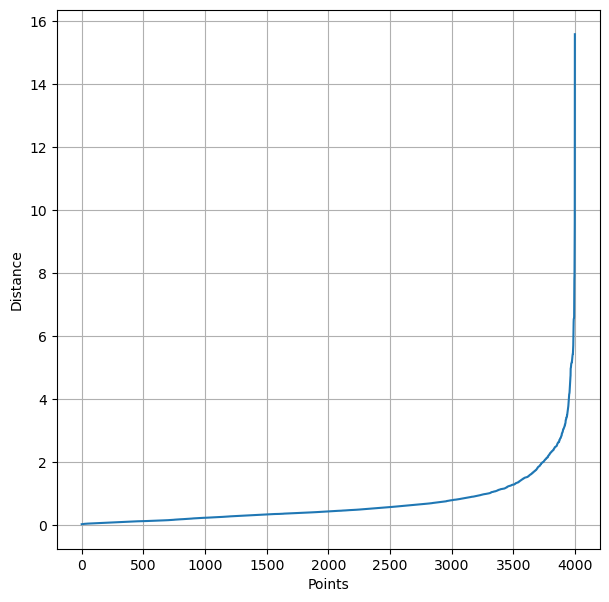

In [13]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
print(distances)
# print(indices)
# print(distances.shape)
distances = np.sort(distances[:,4], axis=0)
#print(distances)
fig = plt.figure(figsize=(7, 7))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()

In [14]:
dbscan=DBSCAN(eps=2.5,min_samples=14)
clusters=dbscan.fit_predict(X)

In [15]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
set(clusters)

{-1, 0, 1}

In [17]:
df['cluster']=dbscan.labels_
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [18]:
from sklearn import cluster
df[df['cluster']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
70,84409,5031,2,1,1,15436,16,1150,4,7766,0,-1
87,609477,0,3,1,1,21422,22,1200,8,6820,0,-1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,-1
3883,126167,0,5,1,1,190160,15,0,0,1612,1,-1
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,-1


In [19]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,dbscan.labels_,metric='euclidean')
score

0.5412265880090159

# K-Means

In [24]:
from sklearn.cluster import KMeans

In [25]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df.iloc[:,1:]),columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll', 'Award?'])
scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0.168982
1,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0.168982
2,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0.168982
3,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0.168982
4,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0.168982
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,0.168982
3995,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,0.168982
3996,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,0.168982
3997,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,0.168982


In [27]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   float64
 2   cc1_miles          3999 non-null   float64
 3   cc2_miles          3999 non-null   float64
 4   cc3_miles          3999 non-null   float64
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   float64
 7   Flight_miles_12mo  3999 non-null   float64
 8   Flight_trans_12    3999 non-null   float64
 9   Days_since_enroll  3999 non-null   float64
 10  Award?             3999 non-null   float64
dtypes: float64(11)
memory usage: 343.8 KB


[43989.0, 35749.906006480625, 29395.610185712056, 25637.13699089999, 23536.408032649488, 20205.41612592954, 17978.980842977217, 16142.088324218075, 14817.373501806904, 13608.103082839832, 12448.599782763536, 11642.702460517907, 10934.548512683536, 10448.73473406386, 9862.324814871128, 9523.791571404658, 9216.156072600308, 8785.81385910707, 8523.308491242726, 8152.952584789629, 7959.853470527666, 7674.0271025483025, 7552.299039884958, 7278.792442801712]


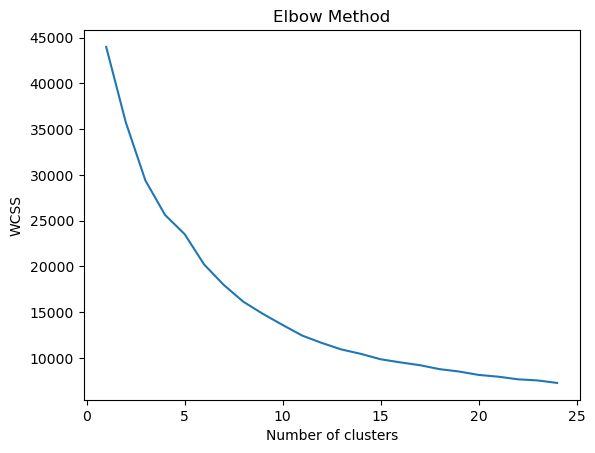

In [29]:
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,25):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
from sklearn.cluster import KMeans
clusters_new=KMeans(3)
clusters_new.fit(scaled_df)

KMeans(n_clusters=3)

In [31]:
clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [32]:
set(clusters_new.labels_)

{0, 1, 2}

In [33]:
df['clusterid_new']=clusters_new.labels_
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [34]:
df.sort_values(by="clusterid_new")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
2565,39715,0,3,1,1,17388,12,0,0,2826,0,0,0
2566,199,0,1,1,1,0,0,0,0,2822,0,0,0
2567,6345,0,2,1,1,7719,18,0,0,2805,1,0,0
2568,72598,0,1,1,1,6090,8,1100,1,2804,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,62183,1896,4,1,1,38635,18,0,0,5738,1,0,2
2672,25681,1526,1,1,1,14941,20,2963,16,2468,1,0,2
1053,165534,0,5,1,1,71312,18,1000,2,5736,1,0,2
1085,258422,0,4,1,1,48708,17,0,0,5657,0,0,2


In [35]:
clusters_new.cluster_centers_

array([[-0.09549281, -0.60819886, -0.03740901, -0.06276658, -0.51516221,
        -0.48610644, -0.14248379, -0.15677515, -0.20617493, -0.34563608,
         0.20512785],
       [ 2.12854286,  0.37374996,  1.3651921 ,  1.48663807,  1.33092052,
         1.58231946,  2.48698074,  2.62928535,  0.30141816,  0.72868553,
        -4.4309318 ],
       [-0.07857904,  1.1732365 , -0.09824189, -0.06276658,  0.86498533,
         0.77475145, -0.02977265, -0.01915601,  0.37553625,  0.60119667,
         0.15084524]])

In [36]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,48044.080733,70.162246,1.224259,1.008970,1.000000,4718.368955,6.944618,260.268721,0.778081,3693.879875,0.203198,0.007800
1,1,218976.629630,1790.685185,2.574074,1.216049,1.302469,49283.845679,26.796296,3941.913580,11.345679,4740.950617,0.722222,-0.993827
2,2,106576.961508,83.524745,3.676355,1.000000,1.000000,38083.549882,19.048704,419.358995,1.304006,4894.718775,0.662215,-0.003928


In [37]:
df[df['clusterid_new']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
5,16420,0,1,1,1,0,0,0,0,6942,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,0,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [38]:
df[df['clusterid_new']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusterid_new
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1,1
65,53914,0,3,1,1,33767,45,5550,29,6826,1,-1,1
70,84409,5031,2,1,1,15436,16,1150,4,7766,0,-1,1
87,609477,0,3,1,1,21422,22,1200,8,6820,0,-1,1
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,8150,0,1,2,1,14135,41,500,2,1676,1,-1,1
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,-1,1
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1,1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,-1,1


In [39]:
df[df['clusterid_new']==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusterid_new
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2
6,84914,0,3,1,1,27482,25,0,0,6994,0,0,2
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0,2
11,96522,0,5,1,1,61105,19,0,0,6924,1,0,2
15,28495,0,4,1,1,49442,15,0,0,6912,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,0,2
3980,28867,0,3,1,1,19169,28,0,0,1425,0,0,2
3985,59017,0,4,1,1,34746,25,0,0,1418,0,0,2
3991,39142,0,3,1,1,14981,28,0,0,1408,0,0,2


In [40]:
from sklearn.metrics import silhouette_score
score=silhouette_score(scaled_df,clusters_new.labels_,metric='euclidean')
score

0.3146532329916994

In [41]:
df1=pd.DataFrame()
df1['cluster_id']=clusters_new.labels_
df1

,cluster_id
0,0
1,0
2,0
3,0
4,2
...,...
3994,0
3995,0
3996,2
3997,0


# Hierarchial

In [61]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [62]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
 11  cluster            3999 non-null   int64
 12  clusterid_new      3999 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 390.7 KB


In [64]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  print(x)
  return x

In [65]:
df.iloc[:,0:-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [66]:
df_norm=norm_func(df.iloc[:,0:])

       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.

df_norm

In [67]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusterid_new
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.5,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.5,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.5,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.5,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0.5,0.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0.5,0.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0.5,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0.5,0.0


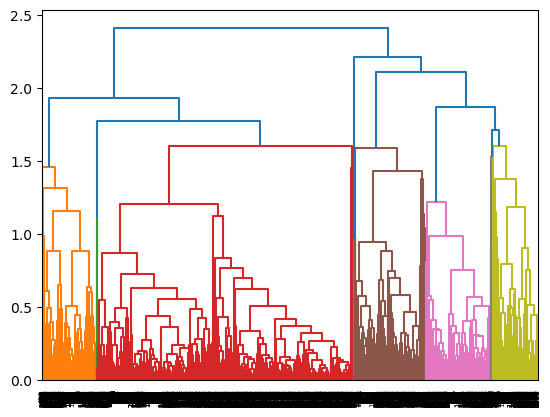

In [68]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [70]:
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='complete',distance_threshold=None)
hc

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

In [71]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [72]:
set(y_hc)

{0, 1, 2}

In [73]:
df['h_clusterid']=y_hc
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusterid_new,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,2,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0,1


In [74]:
df1=df.sort_values("h_clusterid")
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusterid_new,h_clusterid
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,0,2,0
3162,103203,0,1,1,1,3200,4,200,2,1556,1,0,0,0
1513,124775,1704,1,1,1,11564,8,700,2,4847,1,0,0,0
1512,4779,0,1,1,1,600,2,0,0,4926,1,0,0,0
3165,194816,0,1,1,1,20822,25,6647,12,2424,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998,3016,0,1,1,1,0,0,0,0,1398,0,0,0,1
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,-1,1,2
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,-1,1,2
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,-1,1,2


In [77]:
df1.groupby("h_clusterid").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusterid_new
h_clusterid,,,,,,,,,,,,,
0,96958.409614,239.907244,2.662153,1.015572,1.018280,28805.945836,15.637779,805.767773,2.473257,4631.628978,1.0,-0.075829,1.218009
1,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,-0.011914,0.359412
2,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0,-1.000000,1.000000
